In [1]:
import statistics 
import numpy as np 
import random
import math
import matplotlib.pyplot as plt 

Reading the data

In [2]:
trainingData = []

f = open("linregdata", "r")
for line in f:
    tempArray = []
    for word in line.split(','):
        tempArray.append(word)
    trainingData.append(tempArray)

Part a) Transform this attribute into a three column binary representation.

In [3]:
updatedTrainingData =[]   
for row in trainingData:
    if (row[0] == 'M'):
        row.pop(0)
        row[len(row)-1] = row[len(row)-1][:-1]
        updatedTrainingData.append(([0,0,1] + row))
    if (row[0] == 'I'):
        row.pop(0)
        row[len(row)-1] = row[len(row)-1][:-1]
        updatedTrainingData.append(([0,1,0] + row))
    if (row[0] == 'F'):
        row.pop(0)
        row[len(row)-1] = row[len(row)-1][:-1]
        updatedTrainingData.append(([1,0,0] + row))

In [4]:
#converting into float
for i in range( len(updatedTrainingData)):
    for j in range(len(updatedTrainingData[0])):
        updatedTrainingData[i][j] = float(updatedTrainingData[i][j])

In [5]:
data = np.array(updatedTrainingData)

Part b) Standardization

In [6]:
for i in range(len(updatedTrainingData[0]) -1):
    temp = []
    for j in range (len(updatedTrainingData)):
        temp.append(updatedTrainingData[j][i])
    stddev = statistics.stdev(temp)
    mean  = statistics.mean(temp)
    for j in range (len(updatedTrainingData)):
        updatedTrainingData[j][i] = (updatedTrainingData[j][i]- mean)/stddev

In [7]:
updatedTrainingData = np.array(updatedTrainingData)


Part c) All the linear regression functions

In [8]:
def mylinridgereg(X, Y, λ):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.dot(np.linalg.inv(np.dot(X.T, X) + np.dot((λ * np.eye(X.shape[1])).T, λ * np.eye(X.shape[1]))), np.dot(X.T, Y))

In [9]:
def mylinridgeregeval(X, weights):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.dot(X, weights)

In [10]:
def meansquarederr(T, Tdash):
    return (np.power((T - Tdash),2 )).mean()

Part d) Partitioning and then predicting

In [11]:
random.shuffle(updatedTrainingData)
trainData , testData =updatedTrainingData[:3342,:],updatedTrainingData[3342:,:]
trainFeatures,trainLables = trainData[:,:10],trainData[:,10:]
trainLables = trainLables.flatten()
# print(len(trainLables))
testFeatures,testLables = testData[:,:10],testData[:,10:]
testLables = testLables.flatten()
# print(trainLables)


In [12]:
for lamb in range(26):
    weights = mylinridgereg(trainFeatures,trainLables, lamb)
    print('Testing data error for λ =', lamb," is ",meansquarederr(testLables,mylinridgeregeval(testFeatures,weights)))
    print('Training data errorfor λ =', lamb," is ",meansquarederr(trainLables,mylinridgeregeval(trainFeatures,weights)))

Testing data error for λ = 0  is  5.032914021361226
Training data errorfor λ = 0  is  5.738222760813929
Testing data error for λ = 1  is  4.973943188461152
Training data errorfor λ = 1  is  5.565528781117265
Testing data error for λ = 2  is  4.9323983856621005
Training data errorfor λ = 2  is  5.5707548301667655
Testing data error for λ = 3  is  4.886254270598956
Training data errorfor λ = 3  is  5.585612651985782
Testing data error for λ = 4  is  4.845460754058063
Training data errorfor λ = 4  is  5.609515288615993
Testing data error for λ = 5  is  4.810889962150173
Training data errorfor λ = 5  is  5.639241365668661
Testing data error for λ = 6  is  4.780678759379673
Training data errorfor λ = 6  is  5.672692496171281
Testing data error for λ = 7  is  4.753519714153185
Training data errorfor λ = 7  is  5.709719597783224
Testing data error for λ = 8  is  4.729256138989025
Training data errorfor λ = 8  is  5.751520530847848
Testing data error for λ = 9  is  4.708603769993051
Training d

Part e) The most important attribuites are one in which absolute value of weight is higher

In [13]:
# lambda = 9 gives the least testing error 4.708
lamb = 9
weights = mylinridgereg(trainFeatures,trainLables, lamb)
print('Testing data error for λ =', lamb," is ",meansquarederr(testLables,mylinridgeregeval(testFeatures,weights)))
print('Training data errorfor λ =', lamb," is ",meansquarederr(trainLables,mylinridgeregeval(trainFeatures,weights)))
print(weights)

Testing data error for λ = 9  is  4.708603769993051
Training data errorfor λ = 9  is  5.799958507017382
[10.03196897  0.17770246 -0.33638079  0.15505462  0.34134629  0.72639189
  0.83758216  0.93391227 -2.68491663 -0.46308246  2.09523546]


Removing 2 least significant features, testing and training error decreases

In [21]:
trf2 = np.copy(trainFeatures)
tef2 = np.copy(testFeatures)
trf2 = np.delete(trf2,[1,3],axis = 1)
tef2 = np.delete(tef2,[1,3],axis = 1)

In [22]:
lamb = 9
weights = mylinridgereg(trf2,trainLables, lamb)
print('Testing data error for λ =', lamb," is ",meansquarederr(testLables,mylinridgeregeval(tef2,weights)))
print('Training data errorfor λ =', lamb," is ",meansquarederr(trainLables,mylinridgeregeval(trf2,weights)))
print(weights)

Testing data error for λ = 9  is  4.704237986091156
Training data errorfor λ = 9  is  5.803020514221526
[10.03094983  0.4866511   0.47722731  0.99245031  0.87041877  0.94709492
 -2.6569036  -0.44151631  2.09221993]


Removing 3 least significant features, testing and training error increases.

In [23]:
trf3 = np.copy(trainFeatures)
tef3 = np.copy(testFeatures)
trf3 = np.delete(trf3,[1,3,2],axis = 1)
tef3 = np.delete(tef3,[1,3,2],axis = 1)

In [24]:
lamb = 9
weights = mylinridgereg(trf3,trainLables, lamb)
print('Testing data error for λ =', lamb," is ",meansquarederr(testLables,mylinridgeregeval(tef3,weights)))
print('Training data errorfor λ =', lamb," is ",meansquarederr(trainLables,mylinridgeregeval(trf3,weights)))
print(weights)

Testing data error for λ = 9  is  4.768547870888318
Training data errorfor λ = 9  is  5.893064431979039
[10.08974252  0.16007515  1.1193872   0.93898879  0.9635703  -2.70665407
 -0.39479989  2.09485827]


Part f)

[155.08005537 155.53598141 156.57881208 157.9570474  159.4674594
 161.08960347 162.90740049 165.0396765  167.60868514 170.72950505
 174.50765469 179.03926591 184.41170695 190.70399536 197.98688238]


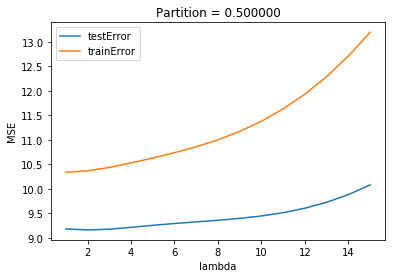

[149.68776275 150.04150605 150.90188576 152.09414189 153.42513796
 154.8400432  156.38282221 158.13833651 160.20066762 162.66042224
 165.60092254 169.09781187 173.21969269 178.02887002 183.58189127]


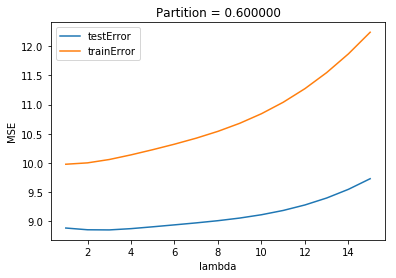

[147.08415016 147.33901485 147.9978555  148.96413078 150.08341668
 151.28780842 152.59115135 154.04953597 155.73378081 157.71602817
 160.06445711 162.84175795 166.10511659 169.90667778 174.29405072]


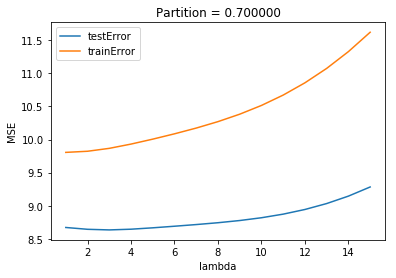

[146.31560396 146.50538989 147.02781516 147.84077147 148.82205716
 149.89751118 151.05954071 152.3424138  153.79886431 155.48658039
 157.4619206  159.77752606 162.48175174 165.61883874 169.22931156]


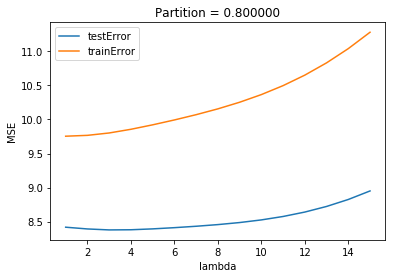

[143.71272844 143.87971126 144.35587735 145.12081797 146.06080014
 147.09047096 148.18427041 149.36004333 150.65770985 152.12529195
 153.81171223 155.76365591 158.02449809 160.63416717 163.62937108]


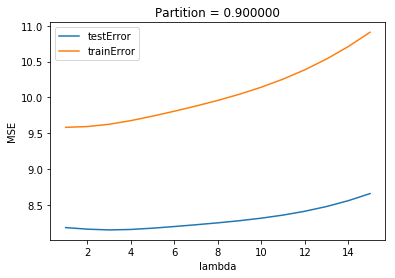

In [27]:
minmse = []
lambdaMin = []
for ratio in [.5,.6,.7,.8,.9]:
    xAxis = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
    yAxis1 = np.zeros(15)
    yAxis2 = np.zeros(15)
    for z in range(25):
        temp1 = []
        temp2 = []
        tempdata = data.copy()
        random.shuffle(tempdata)
        idx =  int(math.ceil(len(tempdata) * ratio))
        trainData , testData =tempdata[:idx,:],tempdata[idx:,:]
        trainFeatures,trainLables = trainData[:,:10],trainData[:,10:]
        trainLables = trainLables.flatten()
        # print(len(trainLables))
        testFeatures,testLables = testData[:,:10],testData[:,10:]
        testLables = testLables.flatten()

        for i in range(len(trainFeatures[0])):
            temp = []
            for j in range (len(trainFeatures)):
                temp.append(trainFeatures[j][i])
            stddev = statistics.stdev(temp)
            mean  = statistics.mean(temp)
            for j in range (len(trainFeatures)):
                trainFeatures[j][i] = (trainFeatures[j][i]- mean)/stddev
            for j in range (len(testFeatures)):
                testFeatures[j][i] = (testFeatures[j][i]- mean)/stddev
        for lamb in range(1,16):
            weights = mylinridgereg(trainFeatures,trainLables, lamb)    
    #         print('Testing data error with partition = ',ratio, 'for λ =', lamb," is ",meansquarederr(testLables,mylinridgeregeval(testFeatures,weights)))
    #         print('Testing data error with partition = ',ratio, 'for λ =', lamb," is ",meansquarederr(trainLables,mylinridgeregeval(trainFeatures,weights)))
            temp1.append(meansquarederr(testLables,mylinridgeregeval(testFeatures,weights)))
            temp2.append(meansquarederr(trainLables,mylinridgeregeval(trainFeatures,weights)))
        yAxis1 = yAxis1 + np.array(temp1)
        yAxis2 = yAxis2 + np.array(temp2)
    print(yAxis2)
    yAxis1 = yAxis1 / 15
    yAxis2 = yAxis2 / 15
    minmse.append(np.amin(yAxis1))
    lambdaMin.append(list(yAxis1).index(np.amin(yAxis1)))
    plt.plot(xAxis, yAxis1, label  = "testError")
    plt.plot(xAxis, yAxis2, label  = "trainError")
    plt.xlabel('lambda') 
    plt.ylabel('MSE')
    plt.title('Partition = %lf'% ratio) 
    plt.legend()
    plt.show()

Part g)

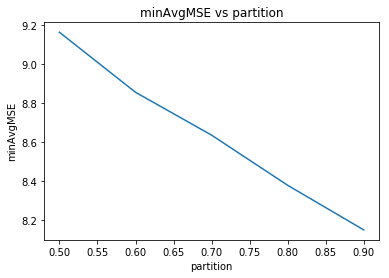

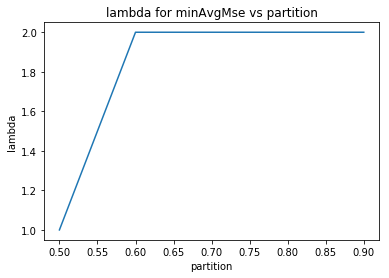

In [28]:
    plt.plot([.5,.6,.7,.8,.9], minmse)
    plt.xlabel('partition') 
    plt.ylabel('minAvgMSE')
    plt.title('minAvgMSE vs partition') 
    plt.show()
    plt.plot([.5,.6,.7,.8,.9], lambdaMin)
    plt.xlabel('partition') 
    plt.ylabel('lambda')
    plt.title('lambda for minAvgMse vs partition') 
    plt.show()

Part h) min error for partition .90

In [30]:
partition = .9 
lamb = 2
tempdata = data.copy()
random.shuffle(tempdata)
idx =  int(math.ceil(len(tempdata) * ratio))
trainData , testData =tempdata[:idx,:],tempdata[idx:,:]
trainFeatures,trainLables = trainData[:,:10],trainData[:,10:]
trainLables = trainLables.flatten()
# print(len(trainLables))
testFeatures,testLables = testData[:,:10],testData[:,10:]
testLables = testLables.flatten()

for i in range(len(trainFeatures[0])):
    temp = []
    for j in range (len(trainFeatures)):
        temp.append(trainFeatures[j][i])
    stddev = statistics.stdev(temp)
    mean  = statistics.mean(temp)
    for j in range (len(trainFeatures)):
        trainFeatures[j][i] = (trainFeatures[j][i]- mean)/stddev
    for j in range (len(testFeatures)):
        testFeatures[j][i] = (testFeatures[j][i]- mean)/stddev
weights = mylinridgereg(trainFeatures,trainLables, lamb)  
testPredictions = mylinridgeregeval(testFeatures,weights)
trainPredictions = mylinridgeregeval(trainFeatures,weights)


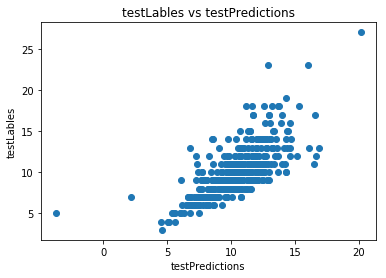

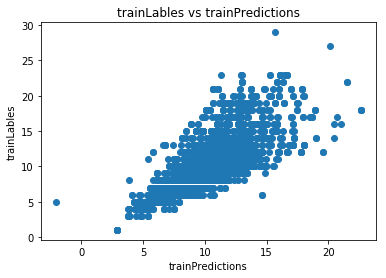

In [31]:
plt.plot(testPredictions, testLables, 'o')
plt.xlabel('testPredictions') 
plt.ylabel('testLables')
plt.title('testLables vs testPredictions') 
plt.show()
plt.plot(trainPredictions, trainLables, 'o')
plt.xlabel('trainPredictions') 
plt.ylabel('trainLables')
plt.title('trainLables vs trainPredictions') 
plt.show()